# Exploratory Data Analysis
<img src='https://cdn.discordapp.com/attachments/659054232632164355/936889608271200297/wallhaven-013q51.png'></img>

#Author: Connor MacLeod
#Date: Aujourd'hui.

# Introduction to the Dataset

<YOUR DESCRIPTION HERE>

This [dataset](https://www.youtube.com/watch?v=dQw4w9WgXcQ) is described as such and is made out of of this and that feature, whatever

Library Setup

In [23]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [27]:
%pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


Imports

In [30]:
# Base libraries
import time
import datetime
import os

# Scientific libraries
import numpy as np
import pandas as pd
import sklearn
from empiricaldist import Cdf, Pmf

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno  # Visualize missing values

# Helper libraries
from tqdm.notebook import tqdm, trange
from colorama import Fore, Back, Style
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit

# Seed value for numpy.random
np.random.seed(69)

Load the dataset:

In [31]:
from sklearn.datasets import fetch_covtype

# load dataset
data = fetch_covtype(as_frame=True)
# define features
X = data.data
# define target
y = data.target
# create dataframe for exploitation via pandas
dataframe = data.frame

# Data Exploration

In [32]:
print(data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [34]:
dataframe.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Here, a conclusion about the dataset and all that.

### Dataset Columns Description

There are **x columns**:

- **Placeholder**
    - *placeholder*
- **Placeholder**
    - *placeholder*
- **Placeholder**
    - *placeholder*
- **Placeholder**
    - *placeholder*


### Dataset Defects 

- placeholder
- placeholder


### Deal With Missing Values

webscraping, api and stuff

### Looking for NaN 

In [35]:
dataframe.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


*here, a commentary about how things have lots or not lots of NaN*

### Classes repartition

In [36]:
dataframe['Cover_Type'].value_counts(normalize=True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

*here, a commentary about the targets and stuff, I don't know*

# 2. Data Processing

### Drop unnecessary columns

In [37]:
""" 
# Specify the cols to drop
to_drop = [
    'placeholder'
]

# Drop them
dataframe.drop(to_drop, axis='columns', inplace=True)
"""

" \n# Specify the cols to drop\nto_drop = [\n    'placeholder'\n]\n\n# Drop them\ndataframe.drop(to_drop, axis='columns', inplace=True)\n"

### Collapse multiple categories into one

In [38]:
""" 
# Collapse 'Category 1' and 'Category 2' into 'Category 1' (e.g: Collapse 'Music' and 'Music & Audio' into 'Music')
data['filtre'] = data['filtre'].str.replace('ods_type_activite', 'filtre') 
"""

" \n# Collapse 'Category 1' and 'Category 2' into 'Category 1' (e.g: Collapse 'Music' and 'Music & Audio' into 'Music')\ndata['filtre'] = data['filtre'].str.replace('ods_type_activite', 'filtre') \n"

# 3. Univariate Exploration

- Categorical scatterplots:
    - **stripplot()** *(with kind="strip"; the default)*
    - **swarmplot()** *(with kind="swarm")*
- Categorical distribution plots:
    - **boxplot()** *(with kind="box")*
    - **violinplot()** *(with kind="violin")*
    - **boxenplot()** *(with kind="boxen")*
- Categorical estimate plots:
    - **pointplot()** *(with kind="point")*
    - **barplot()** *(with kind="bar")*
    - **countplot()** *(with kind="count")*

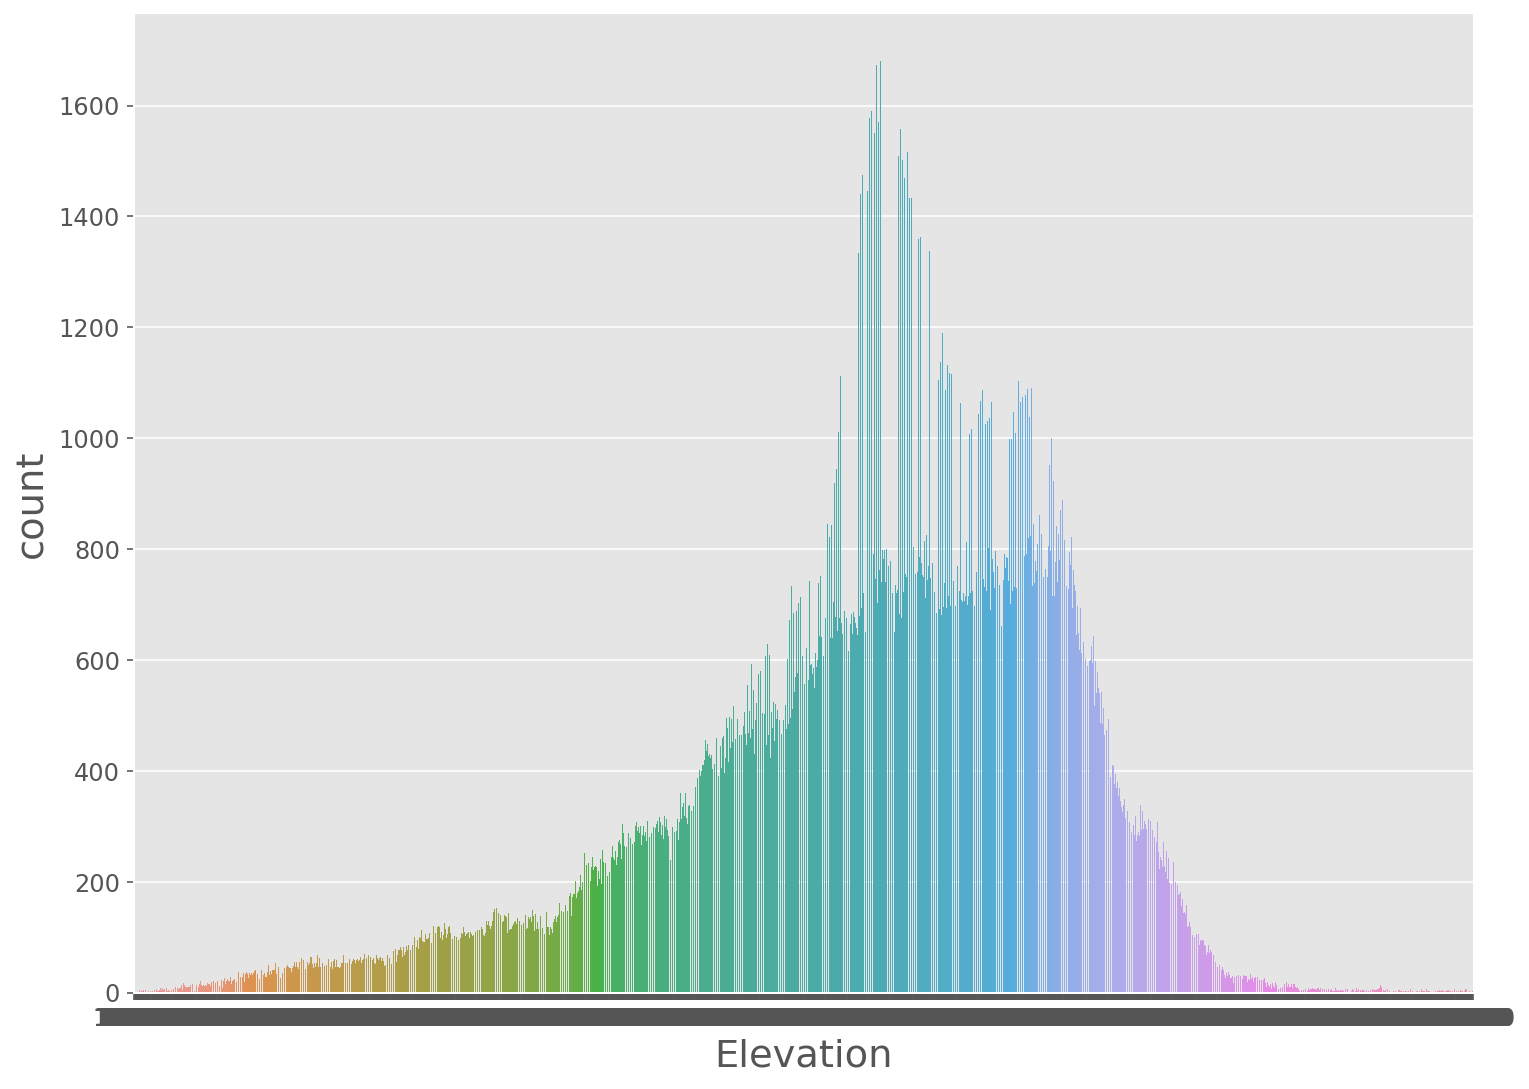

In [39]:
sns.countplot(data=dataframe, x="Elevation")
plt.show()

Here, a conclusion.

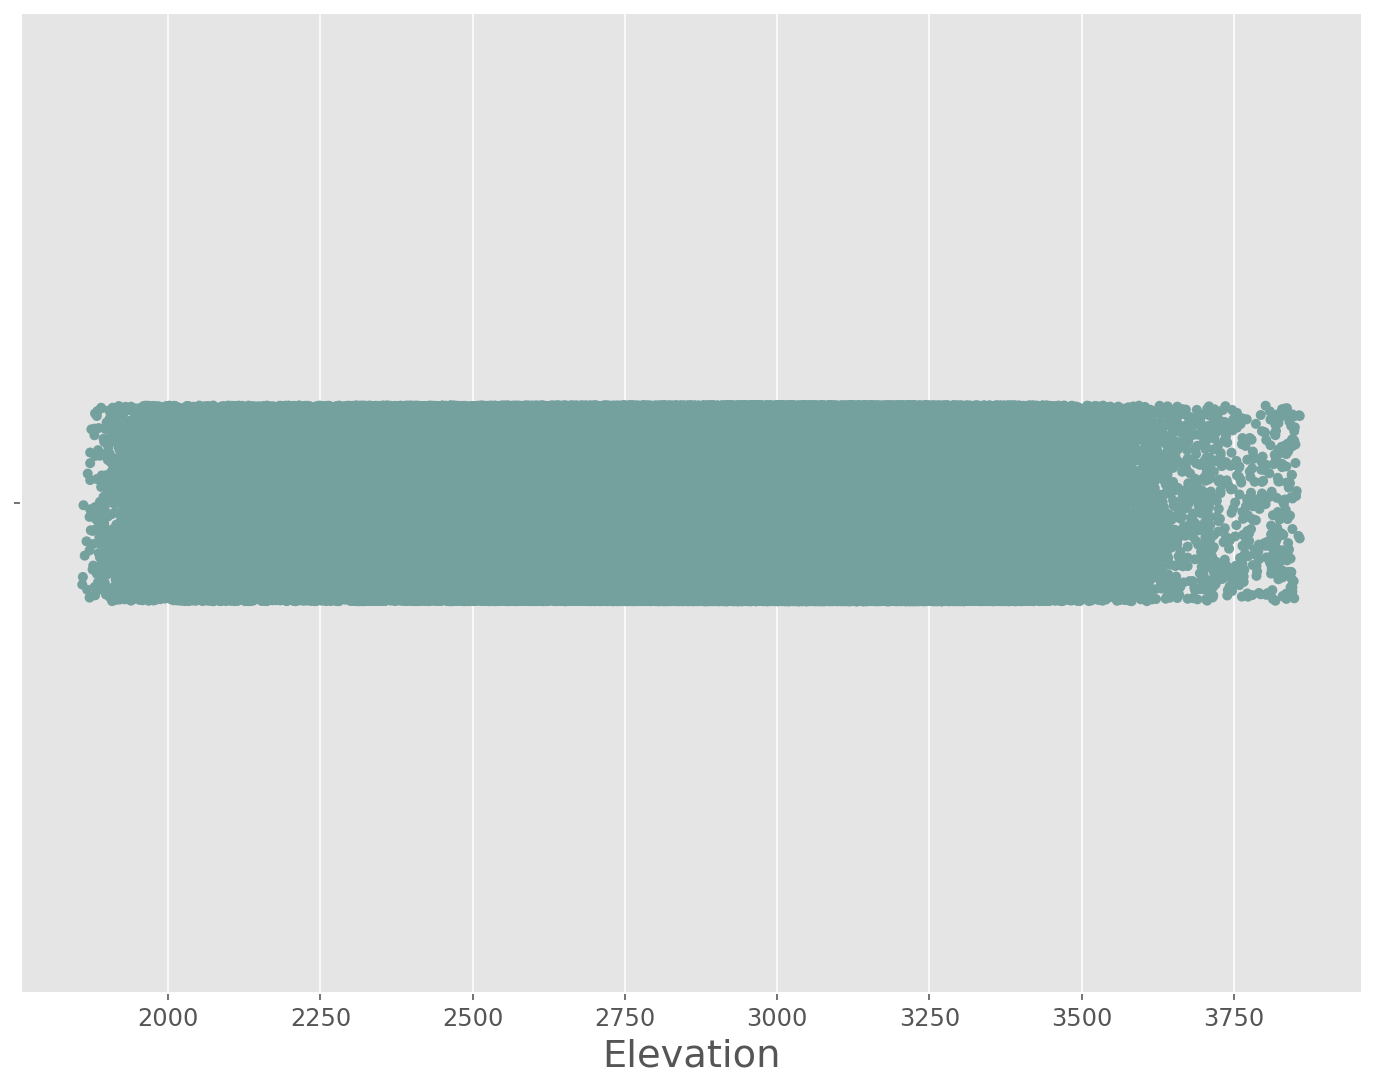

In [40]:
sns.stripplot(data=dataframe, x='Elevation')
plt.show()

Here, a conclusion.

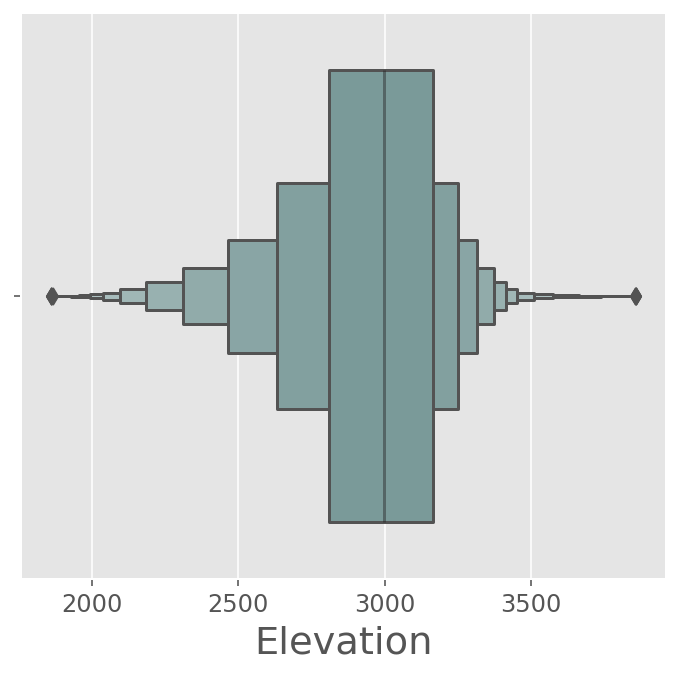

In [41]:
sns.catplot(kind='boxen', data=dataframe, x='Elevation')
plt.show()

Here, a conclusion.

# 4. Bivariate Exploration

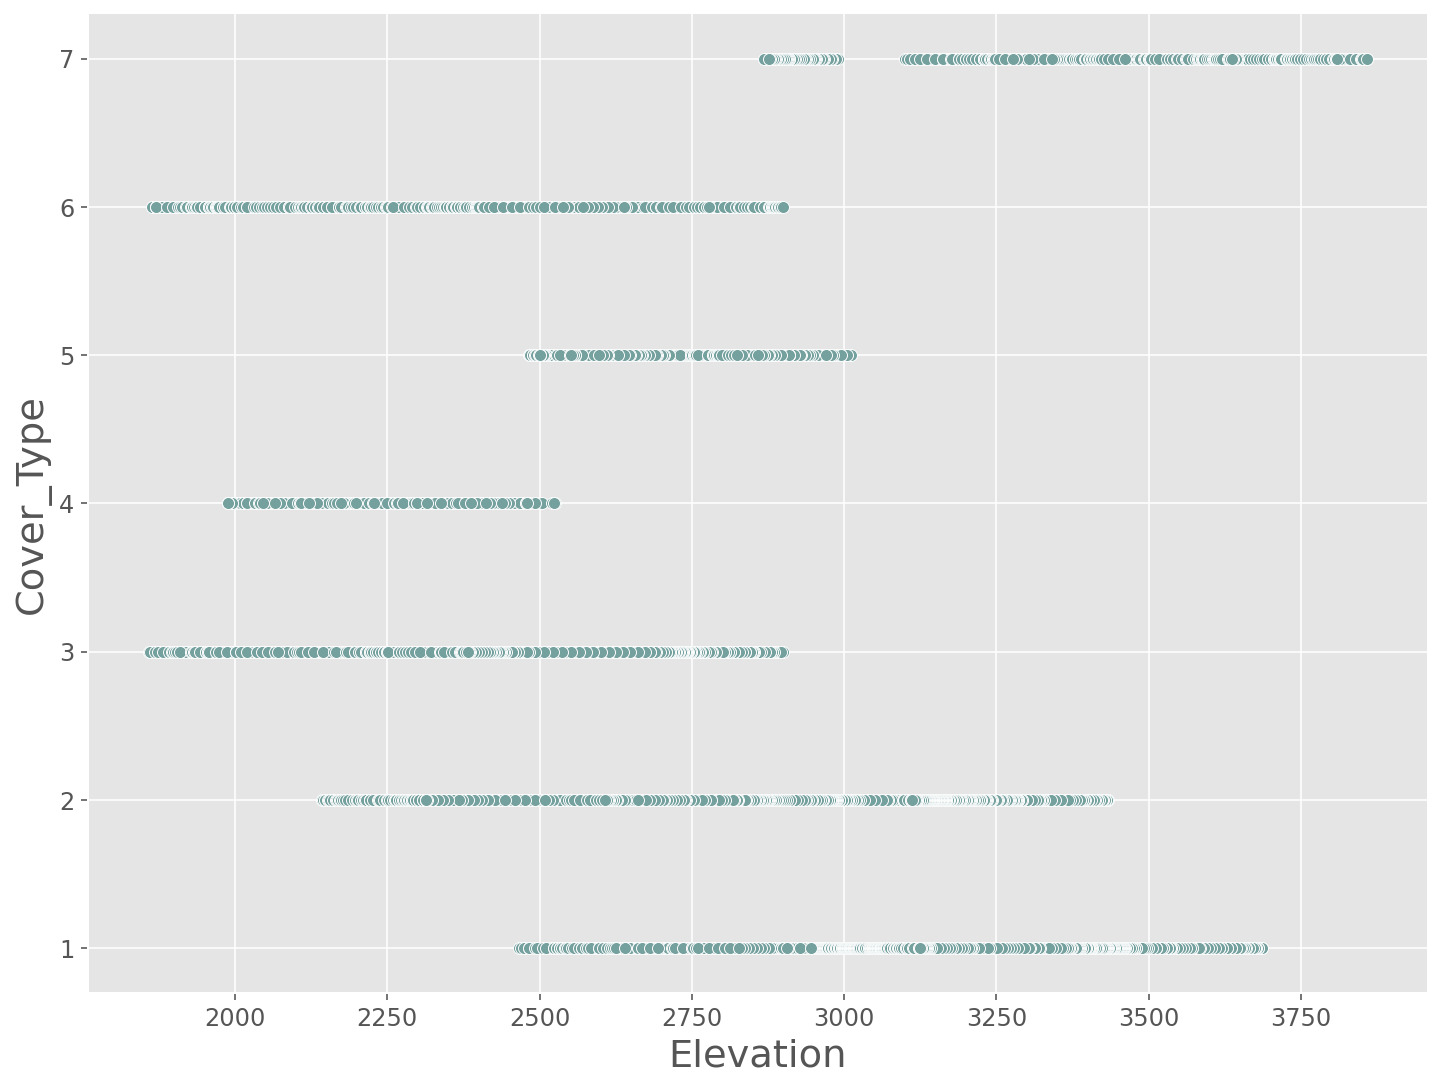

In [42]:
small_data = dataframe.iloc[:,:12].copy()
small_data = pd.concat([small_data, dataframe['Cover_Type'].copy()], axis=1)

sns.scatterplot(data=dataframe, x='Elevation', y='Cover_Type')
plt.show()

Here, a conclusion.

In [43]:
s_pairplot = sns.pairplot(small_data, hue='Cover_Type', height=3, corner=True)

Here, a conclusion.

# 5. Multivariate Exploration

In [ ]:
corr_matrix = dataframe.corr(method='pearson')
plt.matshow(corr_matrix,cmap=plt.get_cmap('magma'))
plt.colorbar()
plt.show()

Here, a conclusion.

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = small_data.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Here, a conclusion.

# 6. Brief Conclusion of the EDA

Here my conclusions or whatever.